In [1]:
#include <TChain.h>
#include <vector>
#include <TFile.h>
#include <iostream>
#include <string>
#include <stdio.h>

In [2]:
// Reading the root file and taking the tree

TFile *file_ttbar = TFile::Open("ntup/410470.PhPy8EG_A14_ttbar_hdamp258p75_nonallhad_ntup.root");
TTree *tree_ttbar = (TTree*) file_ttbar->Get("analysis");
int nentries_ttbar = tree_ttbar->GetEntries();
cout << "ttbar MC sample nentries: " << nentries_ttbar << endl;


TFile *file_Zee = TFile::Open("ntup/700322.Sh_2211_Zee_maxHTpTV2_CVetoBVeto_ntup.root");
TTree *tree_Zee = (TTree*) file_Zee->Get("analysis");
int nentries_Zee = tree_Zee->GetEntries();
cout << "Zee MC sample nentries: " << nentries_Zee << endl;

ttbar MC sample nentries: 57896843
Zee MC sample nentries: 53462644


Error in <TNetXNGFile::Open>: [ERROR] Server responded with an error: [3010] Unable to give access - user access restricted - unauthorized identity used ; Permission denied
Error in <TNetXNGFile::Open>: [ERROR] Server responded with an error: [3010] Unable to give access - user access restricted - unauthorized identity used ; Permission denied


In [3]:
tree_ttbar->Print()

******************************************************************************
*Tree    :analysis  : My analysis ntuple                                     *
*Entries : 57896843 : Total =     20943845043 bytes  File  Size = 9957503426 *
*        :          : Tree compression factor =   2.10                       *
******************************************************************************
*Br    0 :ScaleFactor_PILEUP : ScaleFactor_PILEUP/F                          *
*Entries : 57896843 : Total  Size=  232269742 bytes  File Size  =   69260519 *
*Baskets :     6257 : Basket Size=      32000 bytes  Compression=   3.35     *
*............................................................................*
*Br    1 :ScaleFactor_ELE : ScaleFactor_ELE/F                                *
*Entries : 57896843 : Total  Size=  232250959 bytes  File Size  =   14317342 *
*Baskets :     6257 : Basket Size=      32000 bytes  Compression=  16.21     *
*...................................................

In [4]:
tree_Zee->Print()

******************************************************************************
*Tree    :analysis  : My analysis ntuple                                     *
*Entries : 53462644 : Total =     18832015272 bytes  File  Size = 8495858329 *
*        :          : Tree compression factor =   2.22                       *
******************************************************************************
*Br    0 :ScaleFactor_PILEUP : ScaleFactor_PILEUP/F                          *
*Entries : 53462644 : Total  Size=  214304155 bytes  File Size  =   63490458 *
*Baskets :     4158 : Basket Size=      32000 bytes  Compression=   3.37     *
*............................................................................*
*Br    1 :ScaleFactor_ELE : ScaleFactor_ELE/F                                *
*Entries : 53462644 : Total  Size=  214291669 bytes  File Size  =   19779872 *
*Baskets :     4158 : Basket Size=      32000 bytes  Compression=  10.83     *
*...................................................

In [5]:
for(int i = 0; i < tree_ttbar->GetListOfBranches()->GetEntries(); ++i){
    cout << i << "\t" << tree_ttbar->GetListOfBranches()->At(i)->GetName() << "\t" << tree_Zee->GetListOfBranches()->At(i)->GetName() << '\n'; 
    // cout << tree_ttbar->GetListOfBranches()->At(i)->GetName() << '\n'; 
}

0	ScaleFactor_PILEUP	ScaleFactor_PILEUP
1	ScaleFactor_ELE	ScaleFactor_ELE
2	ScaleFactor_MUON	ScaleFactor_MUON
3	mcWeight	mcWeight
4	trigE	trigE
5	trigM	trigM
6	jet_n	jet_n
7	jet_pt	jet_pt
8	jet_eta	jet_eta
9	jet_phi	jet_phi
10	jet_e	jet_e
11	lep_n	lep_n
12	lep_type	lep_type
13	lep_pt	lep_pt
14	lep_eta	lep_eta
15	lep_phi	lep_phi
16	lep_e	lep_e
17	lep_ptcone30	lep_ptcone30
18	lep_etcone20	lep_etcone20
19	lep_z0	lep_z0
20	lep_d0	lep_d0
21	lep_d0sig	lep_d0sig
22	lep_isTightID	lep_isTightID
23	met	met
24	met_phi	met_phi
25	met_mpx	met_mpx
26	met_mpy	met_mpy


In [6]:
Float_t ScaleFactor_PILEUP;
Float_t ScaleFactor_ELE;
Float_t ScaleFactor_MUON;
Float_t mcWeight;
Bool_t trigE;
Bool_t trigM;
Int_t jet_n;
vector<float> *jet_pt;
vector<float> *jet_eta;
vector<float> *jet_phi;
vector<float> *jet_e;
Int_t lep_n;
vector<unsigned int> *lep_type;
vector<float> *lep_pt;
vector<float> *lep_eta;
vector<float> *lep_phi;
vector<float> *lep_e;
vector<float> *lep_ptcone30;
vector<float> *lep_etcone20;
vector<float> *lep_z0;
vector<float> *lep_d0;
vector<float> *lep_d0sig;
vector<bool> *lep_isTightID;
Float_t met;
Float_t met_phi;
Float_t met_mpx;
Float_t met_mpy;

In [7]:
TTree* set_branch_address(TString name_sample)
{   
    // TFile *file = TFile::Open(fileString);
    // TTree *tree = (TTree*) file_name->Get("analysis");
    TString path="ntup/";
    if(name_sample == "ttbar"){
        path+="410470.PhPy8EG_A14_ttbar_hdamp258p75_nonallhad_ntup.root";
    }
    if(name_sample == "Zee"){
        path+="700322.Sh_2211_Zee_maxHTpTV2_CVetoBVeto_ntup.root";
    }
    TFile *file = TFile::Open(path);
    TTree *tree = (TTree*) file->Get("analysis");
    
    tree->SetBranchAddress("ScaleFactor_PILEUP", &ScaleFactor_PILEUP); 
    tree->SetBranchAddress("ScaleFactor_ELE", &ScaleFactor_ELE);
    tree->SetBranchAddress("ScaleFactor_MUON", &ScaleFactor_MUON);
    tree->SetBranchAddress("mcWeight", &mcWeight);
    tree->SetBranchAddress("trigE", &trigE);
    tree->SetBranchAddress("trigM", &trigM);
    tree->SetBranchAddress("jet_n", &jet_n);
    tree->SetBranchAddress("jet_pt", &jet_pt);
    tree->SetBranchAddress("jet_eta", &jet_eta);
    tree->SetBranchAddress("jet_phi", &jet_phi);
    tree->SetBranchAddress("jet_e", &jet_e);
    tree->SetBranchAddress("lep_n", &lep_n);
    tree->SetBranchAddress("lep_type", &lep_type);
    tree->SetBranchAddress("lep_pt", &lep_pt);
    tree->SetBranchAddress("lep_eta", &lep_eta);
    tree->SetBranchAddress("lep_phi", &lep_phi);
    tree->SetBranchAddress("lep_e", & lep_e);
    tree->SetBranchAddress("lep_ptcone30", &lep_ptcone30);
    tree->SetBranchAddress("lep_etcone20", &lep_etcone20);
    tree->SetBranchAddress("lep_z0", &lep_z0);
    tree->SetBranchAddress("lep_d0", &lep_d0);
    tree->SetBranchAddress("lep_d0sig", &lep_d0sig);
    tree->SetBranchAddress("lep_isTightID", &lep_isTightID);
    tree->SetBranchAddress("met", &met);
    tree->SetBranchAddress("met_phi", &met_phi);
    tree->SetBranchAddress("met_mpx", &met_mpx);
    tree->SetBranchAddress("met_mpy", &met_mpy);
    
    return tree;
}

In [8]:
TCanvas *canvas = new TCanvas("can","", 800, 600);

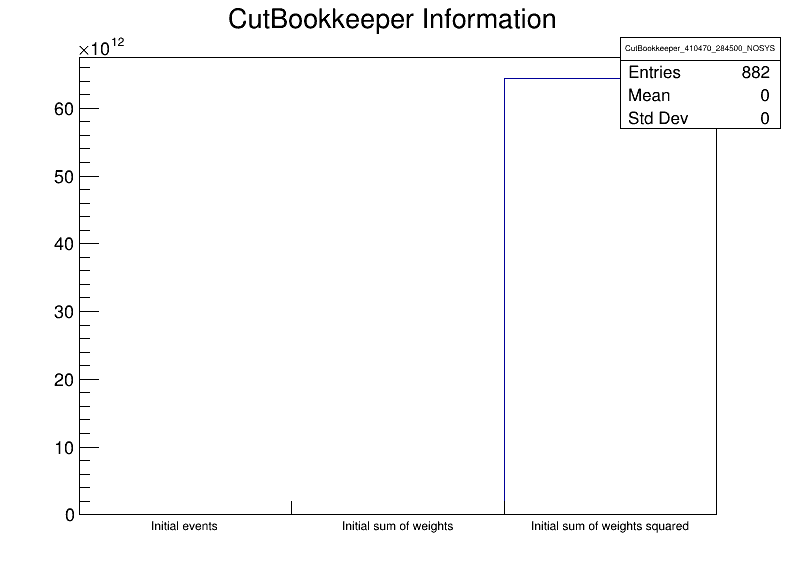

Error in <TNetXNGFile::Open>: [ERROR] Server responded with an error: [3010] Unable to give access - user access restricted - unauthorized identity used ; Permission denied


In [9]:
TFile *file_ttbar_hist = TFile::Open("hist/410470.PhPy8EG_A14_ttbar_hdamp258p75_nonallhad_hist.root");
TH1F *hist_ttbar_weights = (TH1F*) file_ttbar_hist->Get("CutBookkeeper_410470_284500_NOSYS");
hist_ttbar_weights->Draw();
canvas->Draw();

In [10]:
initial_events_ttbar = hist_ttbar_weights->GetBinContent(1);
std::cout << "initial_events_ttbar:" << "\t" << initial_events_ttbar << endl;
initial_sum_of_weights_ttbar = hist_ttbar_weights->GetBinContent(2);
std::cout << "initial_sum_of_weights_ttbar:" << "\t" << initial_sum_of_weights_ttbar << endl;
initial_sum_of_weights_squared_ttbar = hist_ttbar_weights->GetBinContent(3);
std::cout << "initial_sum_of_weights_squared_ttbar:" << "\t" << initial_sum_of_weights_squared_ttbar << endl;

initial_events_ttbar:	1.18733e+08
initial_sum_of_weights_ttbar:	8.66953e+10
initial_sum_of_weights_squared_ttbar:	6.43201e+13


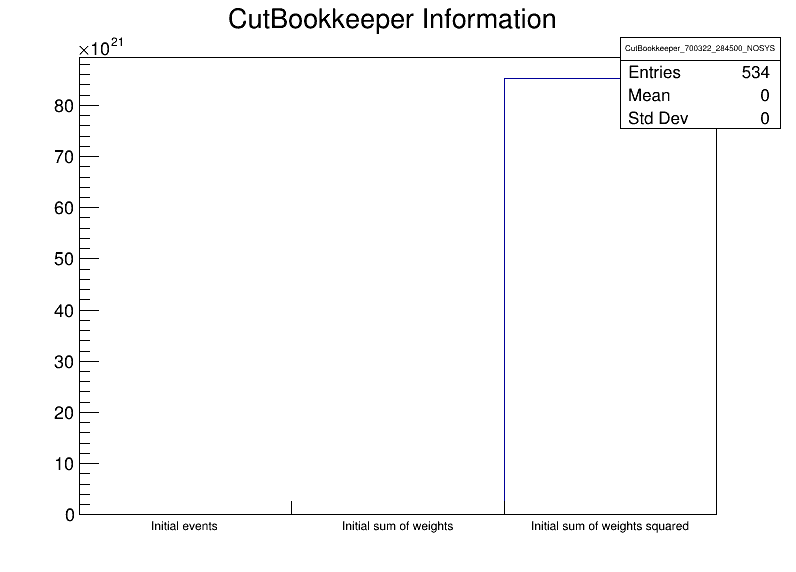

Error in <TNetXNGFile::Open>: [ERROR] Server responded with an error: [3010] Unable to give access - user access restricted - unauthorized identity used ; Permission denied


In [11]:
TFile *file_Zee_hist = TFile::Open("hist/700322.Sh_2211_Zee_maxHTpTV2_CVetoBVeto_hist.root");
TH1F *hist_Zee_weights = (TH1F*) file_Zee_hist->Get("CutBookkeeper_700322_284500_NOSYS");
hist_Zee_weights->Draw();
canvas->Draw();

In [12]:
initial_events_Zee = hist_Zee_weights->GetBinContent(1);
std::cout << "initial_events_Zee:" << "\t" << initial_events_Zee << endl;
initial_sum_of_weights_Zee = hist_Zee_weights->GetBinContent(2);
std::cout << "initial_sum_of_weights_Zee:" << "\t" << initial_sum_of_weights_Zee << endl;
initial_sum_of_weights_squared_Zee = hist_Zee_weights->GetBinContent(3);
std::cout << "initial_sum_of_weights_squared_Zee:" << "\t" << initial_sum_of_weights_squared_Zee << endl;
std::cout << typeid(initial_sum_of_weights_squared_Zee).name() << endl;

initial_events_Zee:	7.54322e+07
initial_sum_of_weights_Zee:	1.05637e+15
initial_sum_of_weights_squared_Zee:	8.51602e+22
d


In [13]:
for(int i = 0; i < tree_ttbar->GetListOfBranches()->GetEntries(); ++i){
    // cout << i << "\t" << tree_ttbar->GetListOfBranches()->At(i)->GetName() << '\n'; 
    cout << tree_ttbar->GetListOfBranches()->At(i)->GetName() << '\n'; 
}

ScaleFactor_PILEUP
ScaleFactor_ELE
ScaleFactor_MUON
mcWeight
trigE
trigM
jet_n
jet_pt
jet_eta
jet_phi
jet_e
lep_n
lep_type
lep_pt
lep_eta
lep_phi
lep_e
lep_ptcone30
lep_etcone20
lep_z0
lep_d0
lep_d0sig
lep_isTightID
met
met_phi
met_mpx
met_mpy


In [14]:
string name1 = tree_ttbar->GetListOfBranches()->At(0)->GetName();
cout << name1 << "\n";

ScaleFactor_PILEUP


In [15]:
/*
TTree *tree_ttbar_2 = new TTree("analysis", "analysis");

tree_ttbar_2 = set_branch_address("ttbar");

tree_ttbar_2->Print()
*/

In [16]:
TFile *output_ttbar = new TFile("ttbar.root", "create");
TTree *tree_ttbar_2 = new TTree("analysis", "analysis");

tree_ttbar_2 = set_branch_address("ttbar");

Float_t initial_events_ttbar = 0;
Float_t initial_sum_of_weights_ttbar = 0;
Float_t initial_sum_of_weights_squared_ttbar = 0;

tree_ttbar_2->Branch("initial_events_ttbar", &initial_events_ttbar, "initial_events_ttbar/F");
tree_ttbar_2->Branch("initial_sum_of_weights_ttbar", &initial_sum_of_weights_ttbar, "initial_sum_of_weights_ttbar/F");
tree_ttbar_2->Branch("initial_sum_of_weights_squared_ttbar", &initial_sum_of_weights_squared_ttbar, "initial_sum_of_weights_squared_ttbar/F");

int nbytes = 0;

int nentries_ttbar_2 = tree_ttbar_2->GetEntries();

for(int ii=0; ii<nentries_ttbar_2*0.0000001; ii++){
    
    nbytes = tree_ttbar_2->GetEntry(ii);
    
    initial_events_ttbar = hist_ttbar_weights->GetBinContent(1);
    initial_sum_of_weights_ttbar = hist_ttbar_weights->GetBinContent(2);
    initial_sum_of_weights_squared_ttbar = hist_ttbar_weights->GetBinContent(3);

    tree_ttbar_2->Fill();
}

/*
initial_events_ttbar = hist_ttbar_weights->GetBinContent(1);
initial_sum_of_weights_ttbar = hist_ttbar_weights->GetBinContent(2);
initial_sum_of_weights_squared_ttbar = hist_ttbar_weights->GetBinContent(3);

tree_ttbar->Fill();
*/
tree_ttbar_2->Print();

******************************************************************************
*Tree    :analysis  : My analysis ntuple                                     *
*Entries : 57896849 : Total =     20946400146 bytes  File  Size = 9957503426 *
*        :          : Tree compression factor =   2.10                       *
******************************************************************************
*Br    0 :ScaleFactor_PILEUP : ScaleFactor_PILEUP/F                          *
*Entries : 57896849 : Total  Size=  232294988 bytes  File Size  =   69260519 *
*Baskets :     6257 : Basket Size=      32000 bytes  Compression=   3.35     *
*............................................................................*
*Br    1 :ScaleFactor_ELE : ScaleFactor_ELE/F                                *
*Entries : 57896849 : Total  Size=  232276199 bytes  File Size  =   14317342 *
*Baskets :     6257 : Basket Size=      32000 bytes  Compression=  16.21     *
*...................................................

Error in <TFile::TFile>: file /eos/home-g/garciarm/SWAN_projects/ntuples_open_data/ttbar.root already exists
Error in <TNetXNGFile::Open>: [ERROR] Server responded with an error: [3010] Unable to give access - user access restricted - unauthorized identity used ; Permission denied


In [17]:
Float_t initial_events_ttbar;
Float_t initial_sum_of_weights_ttbar;
Float_t initial_sum_of_weights_squared_ttbar; 
Float_t ScaleFactor_PILEUP;
Float_t ScaleFactor_ELE;
Float_t ScaleFactor_MUON;
Float_t mcWeight;

tree_ttbar_2->SetBranchAddress("ScaleFactor_PILEUP", &ScaleFactor_PILEUP); 
tree_ttbar_2->SetBranchAddress("ScaleFactor_ELE", &ScaleFactor_ELE);
tree_ttbar_2->SetBranchAddress("ScaleFactor_MUON", &ScaleFactor_MUON);
tree_ttbar_2->SetBranchAddress("mcWeight", &mcWeight);
tree_ttbar_2->SetBranchAddress("initial_events_ttbar", &initial_events_ttbar);
tree_ttbar_2->SetBranchAddress("initial_sum_of_weights_ttbar", &initial_sum_of_weights_ttbar);
tree_ttbar_2->SetBranchAddress("initial_sum_of_weights_squared_ttbar", &initial_sum_of_weights_squared_ttbar);

int nbytes = 0;

cout << "ScaleFactor_PILEUP" << "\t" << "ScaleFactor_ELE" << "\t" << "ScaleFactor_MUON" << "\t" << "initial_events_ttbar" << "\t" << "initial_sum_of_weights_ttbar" << "\t" << "initial_sum_of_weights_squared_ttbar" << endl;

for(int ii=0; ii<8; ii++){
    nbytes = tree_ttbar_2->GetEntry(ii);
    cout << ScaleFactor_PILEUP << "\t" << ScaleFactor_ELE << "\t" << ScaleFactor_MUON << "\t" << initial_events_ttbar << "\t" << initial_sum_of_weights_ttbar << "\t" << initial_sum_of_weights_squared_ttbar << endl;
}

ScaleFactor_PILEUP	ScaleFactor_ELE	ScaleFactor_MUON	initial_events_ttbar	initial_sum_of_weights_ttbar	initial_sum_of_weights_squared_ttbar
1.15715	1	0.997574	1.18733e+08	8.66953e+10	6.43201e+13
1.07271	1	0.994735	1.18733e+08	8.66953e+10	6.43201e+13
1.13447	1	0.994951	1.18733e+08	8.66953e+10	6.43201e+13
0.97898	1	0.995296	1.18733e+08	8.66953e+10	6.43201e+13
1.0441	1	0.995191	1.18733e+08	8.66953e+10	6.43201e+13
1.20236	1	0.994221	1.18733e+08	8.66953e+10	6.43201e+13
1.00143	1	1	1.18733e+08	8.66953e+10	6.43201e+13
1.02421	1	1	1.18733e+08	8.66953e+10	6.43201e+13


In [18]:
Float_t ScaleFactor_PILEUP;
Float_t ScaleFactor_ELE;
Float_t ScaleFactor_MUON;
Float_t mcWeight;

tree_ttbar->SetBranchAddress("ScaleFactor_PILEUP", &ScaleFactor_PILEUP); 
tree_ttbar->SetBranchAddress("ScaleFactor_ELE", &ScaleFactor_ELE);
tree_ttbar->SetBranchAddress("ScaleFactor_MUON", &ScaleFactor_MUON);
tree_ttbar->SetBranchAddress("mcWeight", &mcWeight);


int nbytes = 0;

cout << "ScaleFactor_PILEUP" << "\t" << "ScaleFactor_ELE" << "\t" << "ScaleFactor_MUON" << endl;

for(int ii=0; ii<8; ii++){
    nbytes = tree_ttbar->GetEntry(ii);
    cout << ScaleFactor_PILEUP << "\t" << ScaleFactor_ELE << "\t" << ScaleFactor_MUON << endl;
}

ScaleFactor_PILEUP	ScaleFactor_ELE	ScaleFactor_MUON
1.15715	1	0.997574
1.07271	1	0.994735
1.13447	1	0.994951
0.97898	1	0.995296
1.0441	1	0.995191
1.20236	1	0.994221
1.00143	1	1
1.02421	1	1


In [19]:
int nentries_newttbar_2 = tree_ttbar_2->GetEntries();
cout << nentries_newttbar_2 << endl; 

57896849
